In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Downloading training images
!wget -cq http://imagenet.stanford.edu/internal/car196/cars_train.tgz

In [0]:
# Extracting training images 
!tar xvf cars_train.tgz 

In [0]:
# Dowloading test images
!wget -cq http://imagenet.stanford.edu/internal/car196/cars_test.tgz

In [0]:
# Extracting test images
!tar xvf cars_test.tgz 

cars_train/00169.jpg
cars_train/04261.jpg
cars_train/02637.jpg
cars_train/02759.jpg
cars_train/00288.jpg
cars_train/00049.jpg
cars_train/01354.jpg
cars_train/02776.jpg
cars_train/03433.jpg


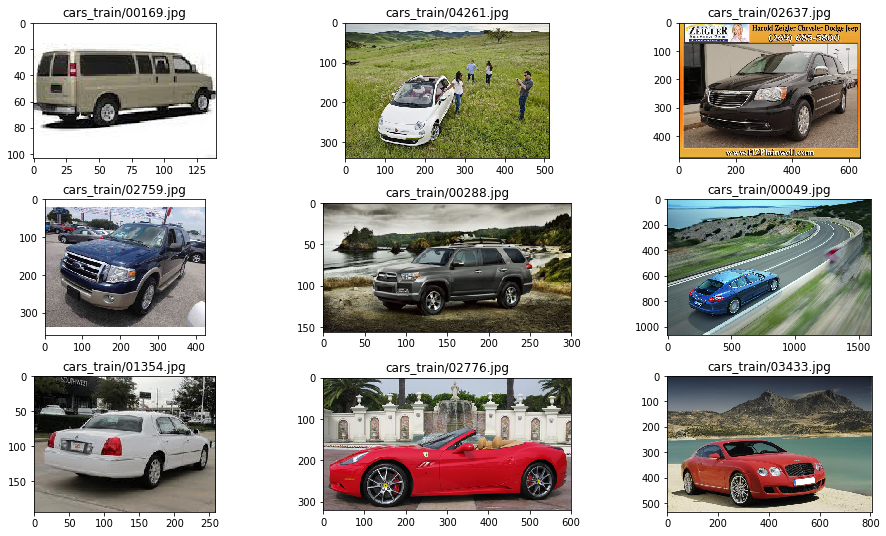

In [0]:
# Displaying a few training images
import matplotlib.pyplot as plt
from PIL import Image
import glob
count=0
fig=plt.figure(figsize=(16, 9))
for filename in glob.glob('cars_train/*.jpg'):
    img=Image.open(filename)
    count = count+1
    fig.add_subplot(3, 3, count)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(img)
    plt.title(filename)
    print (filename)
    if count==9:
      break
      

cars_test/00169.jpg
cars_test/04261.jpg
cars_test/02637.jpg
cars_test/02759.jpg
cars_test/00288.jpg
cars_test/00049.jpg
cars_test/01354.jpg
cars_test/02776.jpg
cars_test/03433.jpg


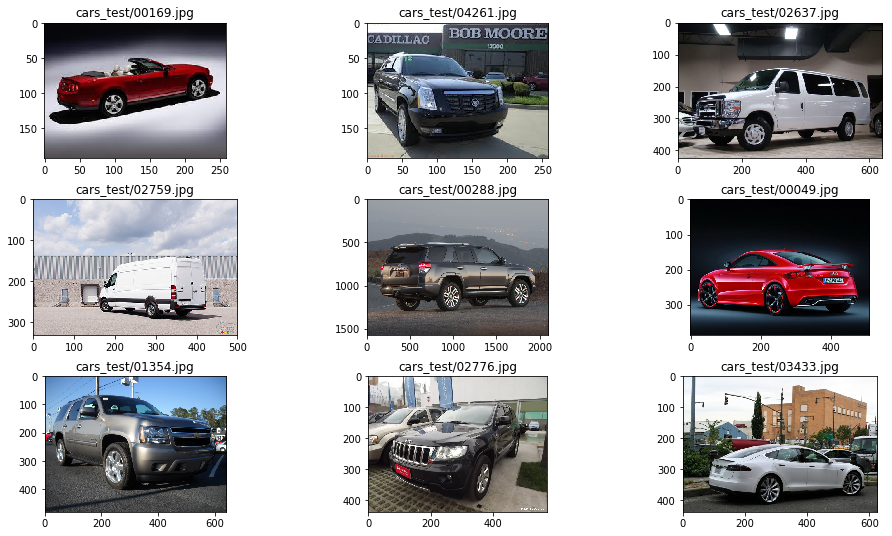

In [0]:
# Displaying a few test images
count=0
fig=plt.figure(figsize=(16, 9))
for filename in glob.glob('cars_test/*.jpg'):
    img=Image.open(filename)
    count = count+1
    fig.add_subplot(3, 3, count)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(img)
    plt.title(filename)
    print (filename)
    if count==9:
      break
      

In [0]:
# Downloading devkit that includes class labels for training images and bounding boxes for all image
!wget -cq https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz

In [0]:
# Extracting devkit
!tar xvf car_devkit.tgz 

devkit/
devkit/cars_meta.mat
devkit/cars_train_annos.mat
devkit/cars_test_annos.mat
devkit/README.txt
devkit/train_perfect_preds.txt
devkit/eval_train.m


In [0]:
# Looking at different class labels
from scipy.io import loadmat
x = loadmat('devkit/cars_meta.mat')
x

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 'class_names': array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
         array(['Acura RL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Type-S 2008'], dtype='<U20'),
         array(['Acura TSX Sedan 2012'], dtype='<U20'),
         array(['Acura Integra Type R 2001'], dtype='<U25'),
         array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
         array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
         array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
         array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
         array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
         array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
         array(['Audi A5 Coupe 2012'], dtype='<U18'),
         array(['Audi TTS Coupe 2012'], d

In [0]:

import tarfile
import scipy.io
import numpy as np
import cv2 as cv
import os
import shutil
import random

def save_train_data(fnames, labels, bboxes):
    src_folder = 'cars_train'
    num_samples = len(fnames)
    
    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)
    
    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]
        
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        
        margin = 16
        x1 = max(0, x1-margin)
        y1 = max(0, y1-margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        
        if i in train_indexes:
            dst_folder = 'gdrive/My Drive/Colab Notebooks/train'
        else:
            dst_folder = 'gdrive/My Drive/Colab Notebooks/valid'
            
        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)
        
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)
        
def save_test_data(fnames, bboxes):
    src_folder = 'cars_test'
    dst_folder = 'gdrive/My Drive/Colab Notebooks/test'
    num_samples = len(fnames)
    
    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        
        margin = 16
        x1 = max(0, x1-margin)
        y1 = max(0, y1-margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        
        dst_path = os.path.join(dst_folder, fname)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)
      
        
def process_train_data():
    cars_annos = scipy.io.loadmat('devkit/cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)
    
    fnames = []
    class_ids = []
    bboxes = []
    labels = []
    
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)
        
    labels_count = np.unique(class_ids).shape[0]
    print('car count: %d' % labels_count)
    
    save_train_data(fnames, labels, bboxes)
    
def process_test_data():
    cars_annos = scipy.io.loadmat('devkit/cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)
    
    fnames = []
    bboxes = []
    
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)
        
    save_test_data(fnames, bboxes)
    print ("hello")

In [0]:
cars_meta = scipy.io.loadmat('devkit/cars_meta')
class_names = cars_meta['class_names']
class_names = np.transpose(class_names)

img_width, img_height = 224, 224

#process_train_data()
process_test_data()

hello


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
basedir='gdrive/My Drive/Colab Notebooks'

In [0]:
data = ImageDataBunch.from_folder(basedir, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [0]:
data.classes

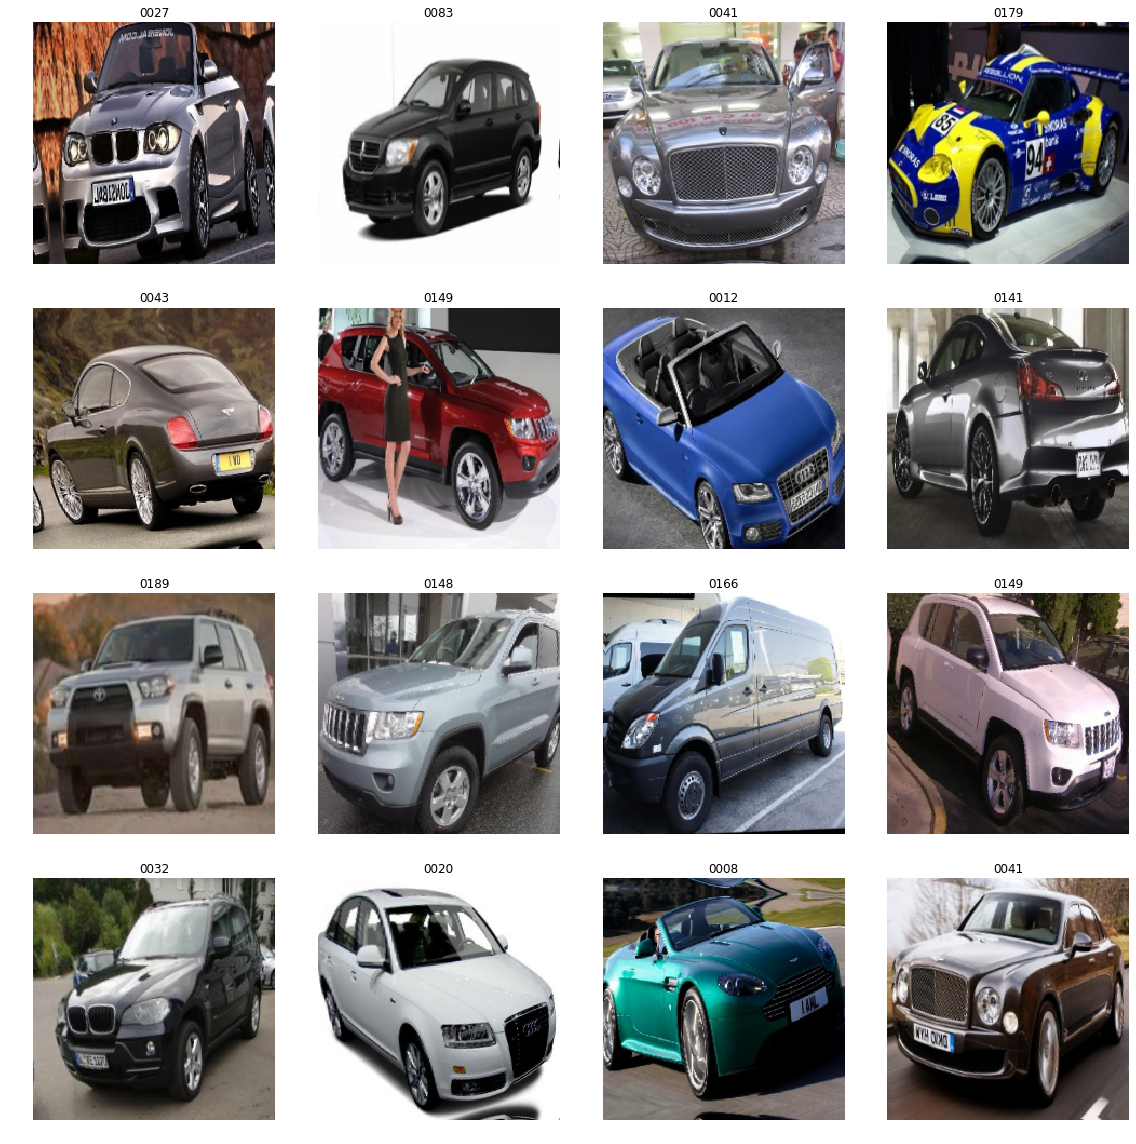

In [0]:
data.show_batch(rows=4)

**Training: resnet34**

 Trained for 8 epochs.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(8)

In [0]:
# saving the first model
learn.save('stage-1')

**Training: resnet50**

Trained for 10 epochs

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
learn.fit_one_cycle(10)

In [0]:
# saving the second model
learn.save('stage-2')

**Results**

Taking a look at which were the categories that the model most confused with one another. 

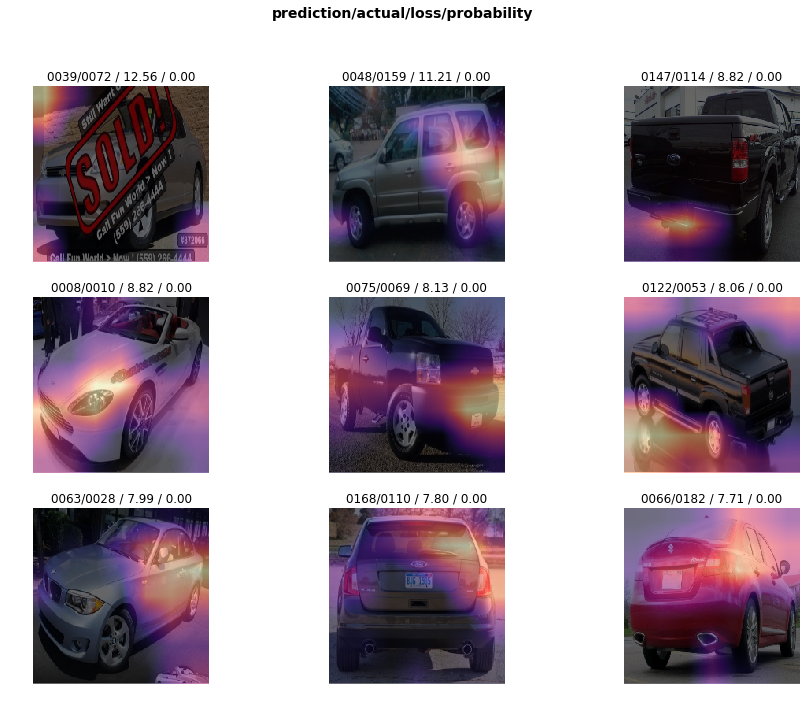

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('0177', '0176', 4),
 ('0009', '0008', 3),
 ('0019', '0014', 3),
 ('0054', '0069', 3),
 ('0071', '0119', 3),
 ('0084', '0083', 3),
 ('0119', '0071', 3),
 ('0138', '0140', 3),
 ('0173', '0144', 3),
 ('0177', '0175', 3),
 ('0183', '0184', 3),
 ('0008', '0144', 2),
 ('0013', '0022', 2),
 ('0013', '0023', 2),
 ('0024', '0013', 2),
 ('0024', '0020', 2),
 ('0024', '0079', 2),
 ('0036', '0027', 2),
 ('0038', '0009', 2),
 ('0039', '0027', 2),
 ('0043', '0042', 2),
 ('0053', '0065', 2),
 ('0053', '0120', 2),
 ('0065', '0121', 2),
 ('0069', '0074', 2),
 ('0069', '0075', 2),
 ('0074', '0075', 2),
 ('0078', '0127', 2),
 ('0096', '0097', 2),
 ('0107', '0059', 2),
 ('0111', '0114', 2),
 ('0122', '0091', 2),
 ('0125', '0124', 2),
 ('0134', '0138', 2),
 ('0143', '0121', 2),
 ('0144', '0009', 2),
 ('0154', '0155', 2),
 ('0159', '0048', 2),
 ('0161', '0072', 2),
 ('0176', '0177', 2),
 ('0179', '0180', 2),
 ('0183', '0139', 2),
 ('0188', '0127', 2)]

**Unfreezing and fine-tuning**


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


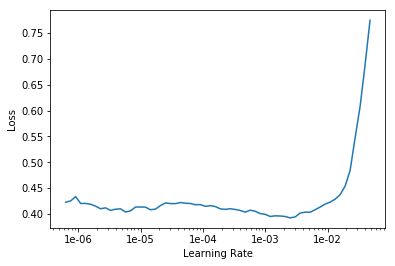

In [0]:

learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(9, max_lr=slice(1e-4,1e-2))

In [0]:
learn.save('stage-3')